[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd

# Read the data

In [97]:
ath=pd.read_csv('drive/MyDrive/athlete_events.csv')

In [98]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [99]:
ath.shape

(271116, 15)

### Don't forget to drop duplicates first

In [100]:
ath = ath.drop_duplicates()

In [101]:
ath.shape

(269731, 15)

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [102]:
ath.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females

In [103]:
ath['Sex'].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [104]:
ath['City'].nunique()

42

In [105]:
ath['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [106]:
year_groups=ath.groupby(['Year'])

In [107]:
year_groups.size()

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [108]:
ath[ath['Name'] == ath['Name'].mode()[0]].iloc[0,0:2]

ID                        106296
Name    Heikki Ilmari Savolainen
Name: 211668, dtype: object

# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this
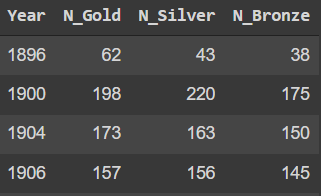

In [142]:
Mg=ath.groupby('Year')['Medal'].value_counts().to_frame()
Mg

Medal
Year Medal        
1896 Gold       62
     Silver     43
     Bronze     38
1900 Silver    220
     Gold      198
...            ...
2014 Bronze    198
     Silver    197
2016 Bronze    703
     Gold      665
     Silver    655

[105 rows x 1 columns]

# <font color='red'>**You are Geek!**</fond>

### What is the number of winners with the gold medal in each city?

In [120]:
cm = ath[ath['Medal']=='Gold'].groupby('City')['Medal'].count().to_frame()
cm.reset_index(inplace=True)
cm.rename(columns={'Medal':'N_GoldWinners'},inplace=True)
cm.sort_values(by='N_GoldWinners',inplace=True,ascending=False)

In [130]:
cm.reset_index(drop=True,inplace=True)
cm

,City,N_GoldWinners
0,London,1215
1,Athina,883
2,Los Angeles,726
3,Beijing,671
4,Rio de Janeiro,665
5,Sydney,663
6,Atlanta,608
7,Barcelona,559
8,Seoul,520
9,Antwerpen,493


### Find the total missing data for each year?

In [122]:
ym=year_groups.apply(lambda x: x.isna().sum())

In [112]:
#Total missing data for each year
ym.sum(axis = 1)

Year
1896     1065
1900     5676
1904     3331
1906     5022
1908     8057
1912    10018
1920    11175
1924    15194
1928    14124
1932     6308
1936    18433
1948    20008
1952    22943
1956    13531
1960    10407
1964     9710
1968     9663
1972    11331
1976    10819
1980     8706
1984    11307
1988    14802
1992    20759
1994     3207
1996    15638
1998     3337
2000    12067
2002     3707
2004    11515
2006     3878
2008    11866
2010     3908
2012    11507
2014     4532
2016    12064
dtype: int64